<a href="https://colab.research.google.com/github/ngoc43456/DuDoanKhaNangMacBenhTimMach/blob/main/D%E1%BB%B1_%C4%91o%C3%A1n_kh%E1%BA%A3_n%C4%83ng_m%E1%BA%AFc_b%E1%BB%87nh_tim_m%E1%BA%A1ch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo graphviz --quiet

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from graphviz import Digraph
from IPython.display import Image
import joblib
from scipy import stats
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# URL của dataset Cleveland (phổ biến nhất)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Tên các cột theo mô tả của UCI
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Đọc dữ liệu
df = pd.read_csv(url, names=column_names, na_values='?')

# Xem thông tin
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# In tỉ lệ missing value cho từng cột
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Tỉ lệ missing value (%):")
print(missing_percent[missing_percent > 0].round(2))

Các dòng có giá trị thiếu:
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
87   53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   
166  52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
192  43.0  1.0  4.0     132.0  247.0  1.0      2.0    143.0    1.0      0.1   
266  52.0  1.0  4.0     128.0  204.0  1.0      0.0    156.0    1.0      1.0   
287  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  target  
87     1.0  0.0   NaN       0  
166    1.0  NaN   3.0       0  
192    2.0  NaN   7.0       1  
266    2.0  0.0   NaN       2  
287    2.0  NaN   7.0       0  
302    1.0  NaN   3.0       0  
Tỉ lệ missing value (%):
ca      1.32
thal    0.66
dtype: float64


In [ ]:
df_filled = df.copy()
# Dùng mode (giá trị xuất hiện nhiều nhất) cho categorical
df_filled['ca'].fillna(df_filled['ca'].mode()[0], inplace=True)
df_filled['thal'].fillna(df_filled['thal'].mode()[0], inplace=True)
# Kiểm tra
print("Sau khi fill:")
print(df_filled.isnull().sum())

Sau khi fill:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Tách biến đầu vào và đầu ra
X = df_filled.drop('target', axis=1)
y = df_filled['target'].apply(lambda x: 1 if int(x) > 0 else 0)

 BẮT ĐẦU PHÂN TÍCH OUTLIERS...
=== THALACH ===
Outliers detected: 1
IQR bounds: 84.8 - 214.8

=== OLDPEAK ===
Outliers detected: 5

=== AGE ===
Outliers detected: 0

=== TRESTBPS ===
Outliers detected: 9

=== CHOL ===
Outliers detected: 5

 THỐNG KÊ TRƯỚC VÀ SAU XỬ LÝ:

--- THALACH ---
Trước: Min=71.0, Max=202.0, Median=153.0
Sau:   Min=84.8, Max=202.0, Median=153.0
Outliers: 1 → 0

--- OLDPEAK ---
Trước: Min=0.0, Max=6.2, Median=0.8
Sau:   Min=0.0, Max=4.0, Median=0.8
Outliers: 5 → 0

--- AGE ---
Trước: Min=29.0, Max=77.0, Median=56.0
Sau:   Min=29.0, Max=77.0, Median=56.0
Outliers: 0 → 0

--- TRESTBPS ---
Trước: Min=94.0, Max=200.0, Median=130.0
Sau:   Min=94.0, Max=170.0, Median=130.0
Outliers: 9 → 0

--- CHOL ---
Trước: Min=126.0, Max=564.0, Median=241.0
Sau:   Min=126.0, Max=371.0, Median=241.0
Outliers: 5 → 0


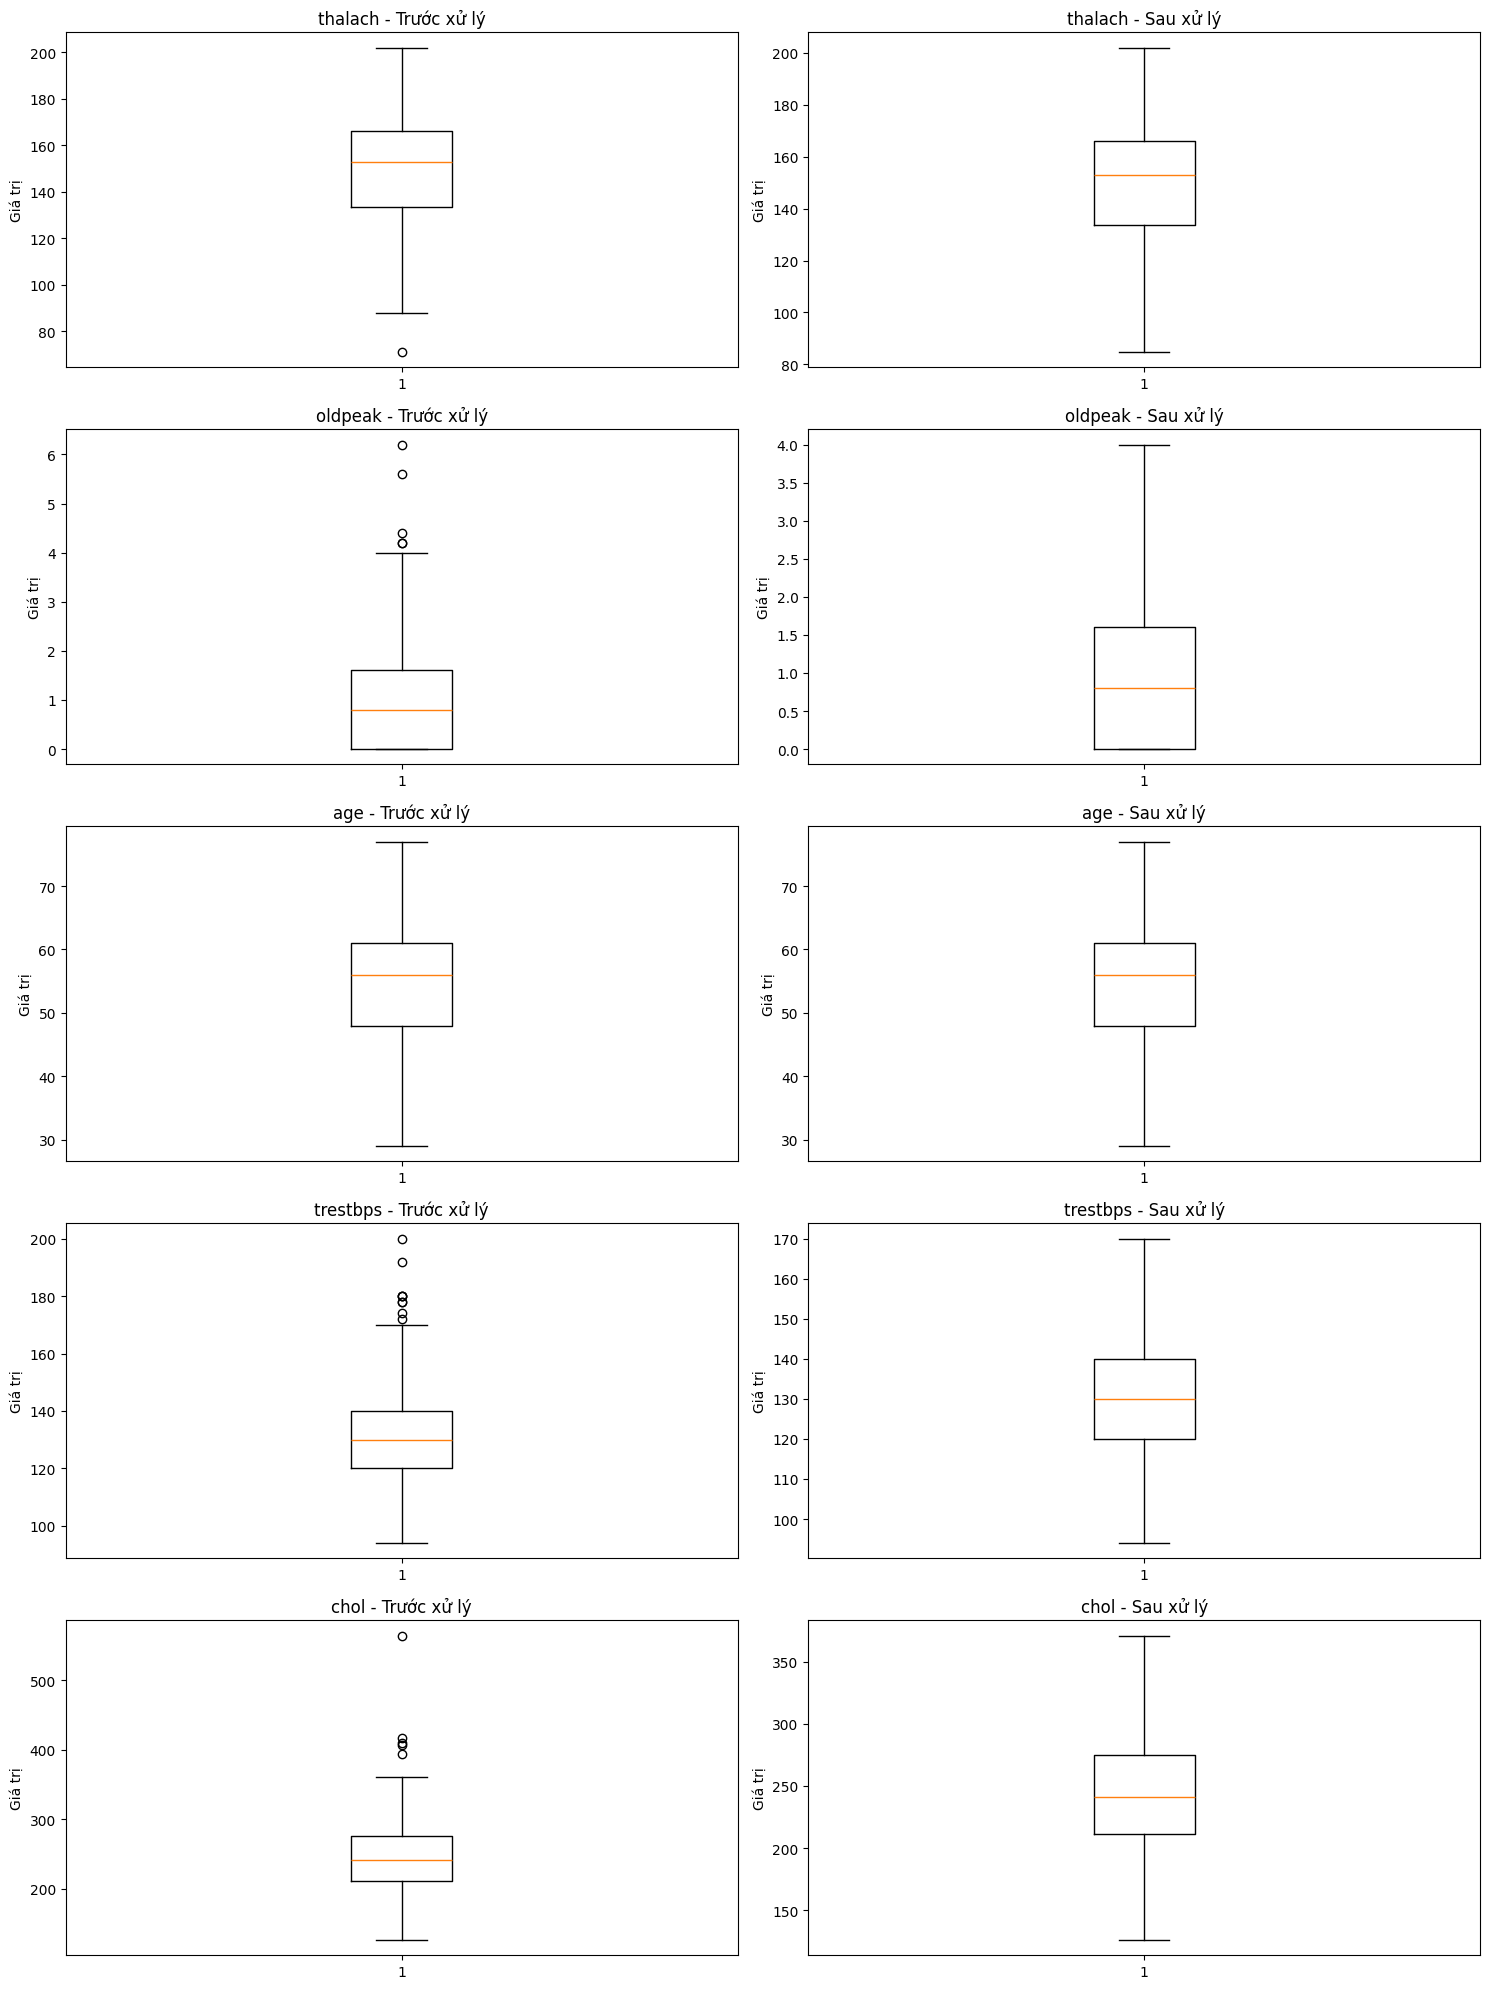


 KIỂM TRA TÍNH CHUẨN (SHAPIRO-WILK TEST):
         shapiro_p is_normal  skewness
thalach   0.000072     False -0.490842
oldpeak        0.0     False  0.992938
age       0.006069     False -0.208024
trestbps  0.000033     False  0.381441
chol      0.020066     False  0.329399

 HOÀN THÀNH! Dữ liệu đã được xử lý.


In [ ]:
# Các phương pháp xử lý outliers
class OutlierHandler:

    def __init__(self, data):
        self.data = data.copy()

    def detect_outliers_iqr(self, column):
        """Phát hiện outliers bằng phương pháp IQR"""
        Q1 = self.data[column].quantile(0.25)
        Q3 = self.data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = self.data[(self.data[column] < lower_bound) |
                             (self.data[column] > upper_bound)]
        return outliers, lower_bound, upper_bound

    def detect_outliers_zscore(self, column, threshold=3):
        """Phát hiện outliers bằng Z-score"""
        z_scores = np.abs(stats.zscore(self.data[column]))
        outliers = self.data[z_scores > threshold]
        return outliers

    def cap_outliers_iqr(self, column):
        """Giới hạn outliers (capping) theo IQR"""
        Q1 = self.data[column].quantile(0.25)
        Q3 = self.data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        self.data[column] = np.clip(self.data[column], lower_bound, upper_bound)
        return self.data

    def remove_outliers(self, column, method='iqr'):
        """Loại bỏ outliers"""
        if method == 'iqr':
            _, lower_bound, upper_bound = self.detect_outliers_iqr(column)
            self.data = self.data[(self.data[column] >= lower_bound) &
                                  (self.data[column] <= upper_bound)]
        elif method == 'zscore':
            z_scores = np.abs(stats.zscore(self.data[column]))
            self.data = self.data[z_scores <= 3]
        return self.data


# Hướng dẫn xử lý cụ thể cho từng biến
def process_heart_data(df):
    """
    Xử lý outliers cho dữ liệu tim mạch
    """
    handler = OutlierHandler(df)

    # 1. THALACH
    print("=== THALACH ===")
    outliers, lower, upper = handler.detect_outliers_iqr('thalach')
    print(f"Outliers detected: {len(outliers)}")
    print(f"IQR bounds: {lower:.1f} - {upper:.1f}")
    handler.cap_outliers_iqr('thalach')

    # 2. OLDPEAK
    print("\n=== OLDPEAK ===")
    outliers, lower, upper = handler.detect_outliers_iqr('oldpeak')
    print(f"Outliers detected: {len(outliers)}")
    handler.cap_outliers_iqr('oldpeak')

    # 3. AGE
    print("\n=== AGE ===")
    outliers, lower, upper = handler.detect_outliers_iqr('age')
    print(f"Outliers detected: {len(outliers)}")
    handler.data['age'] = np.clip(handler.data['age'], 18, 100)

    # 4. TRESTBPS
    print("\n=== TRESTBPS ===")
    outliers, lower, upper = handler.detect_outliers_iqr('trestbps')
    print(f"Outliers detected: {len(outliers)}")
    handler.cap_outliers_iqr('trestbps')

    # 5. CHOL
    print("\n=== CHOL ===")
    outliers, lower, upper = handler.detect_outliers_iqr('chol')
    print(f"Outliers detected: {len(outliers)}")
    handler.data.loc[handler.data['chol'] == 0, 'chol'] = handler.data['chol'].median()
    handler.cap_outliers_iqr('chol')

    return handler.data

    # CHẠY CODE THỰC TẾ
if 'df' in locals() or 'df' in globals():
    print(" BẮT ĐẦU PHÂN TÍCH OUTLIERS...")
    print("="*50)

    # Tạo bản copy để so sánh trước và sau
    original_data = df_filled.copy()

    # Xử lý outliers
    processed_data = process_heart_data(df_filled)

    print("\n THỐNG KÊ TRƯỚC VÀ SAU XỬ LÝ:")
    print("="*50)

    columns_to_check = ['thalach', 'oldpeak', 'age', 'trestbps', 'chol']

    for col in columns_to_check:
        if col in original_data.columns:
            print(f"\n--- {col.upper()} ---")
            print(f"Trước: Min={original_data[col].min():.1f}, Max={original_data[col].max():.1f}, Median={original_data[col].median():.1f}")
            print(f"Sau:   Min={processed_data[col].min():.1f}, Max={processed_data[col].max():.1f}, Median={processed_data[col].median():.1f}")

            # Đếm outliers bằng IQR
            Q1_orig = original_data[col].quantile(0.25)
            Q3_orig = original_data[col].quantile(0.75)
            IQR_orig = Q3_orig - Q1_orig
            outliers_orig = ((original_data[col] < Q1_orig - 1.5 * IQR_orig) |
                             (original_data[col] > Q3_orig + 1.5 * IQR_orig)).sum()

            Q1_proc = processed_data[col].quantile(0.25)
            Q3_proc = processed_data[col].quantile(0.75)
            IQR_proc = Q3_proc - Q1_proc
            outliers_proc = ((processed_data[col] < Q1_proc - 1.5 * IQR_proc) |
                             (processed_data[col] > Q3_proc + 1.5 * IQR_proc)).sum()

            print(f"Outliers: {outliers_orig} → {outliers_proc}")

    # Vẽ biểu đồ boxplot so sánh
    plot_before_after(original_data, processed_data, columns_to_check)

    # Kiểm tra tính chuẩn
    print("\n KIỂM TRA TÍNH CHUẨN (SHAPIRO-WILK TEST):")
    print("="*50)
    normality_results = check_normality(processed_data, columns_to_check)
    print(normality_results[['shapiro_p', 'is_normal', 'skewness']].round(4))

    print(f"\n HOÀN THÀNH! Dữ liệu đã được xử lý.")

else:
    print(" KHÔNG TÌM THẤY DATAFRAME 'df'")
    print("Vui lòng:")
    print("1. Đổi tên DataFrame của bạn thành 'df', HOẶC")
    print("2. Thay 'df' trong code thành tên DataFrame thực tế của bạn")
    print("\nVí dụ:")
    print("# Nếu DataFrame của bạn tên là 'heart_data':")
    print("# processed_data = process_heart_data(heart_data)")



In [ ]:
def auto_transform_skewed_data(df, columns, skew_threshold=1, keep_original=True):
    """
    Tự động phát hiện và biến đổi các cột có skewness cao.

    Parameters:
    - df: DataFrame đầu vào
    - columns: Danh sách các cột cần kiểm tra
    - skew_threshold: Ngưỡng skewness để quyết định có cần biến đổi
    - keep_original: Giữ cột gốc hay thay thế bằng cột mới

    Returns:
    - DataFrame sau biến đổi
    - Danh sách các cột đã biến đổi
    """
    handler = OutlierHandler(df)
    transformed_columns = []

    for col in columns:
        skew_value = stats.skew(handler.data[col].dropna())
        print(f" {col}: Skewness = {skew_value:.4f}")

        if abs(skew_value) > skew_threshold:
            if (handler.data[col] <= 0).any():
                print(f" {col} có giá trị <= 0, sử dụng √ (sqrt transformation)")
                handler.transform_data(col, method='sqrt')
                new_col = f'{col}_sqrt'
            else:
                print(f" {col} có skewness cao, sử dụng log transformation")
                handler.transform_data(col, method='log')
                new_col = f'{col}_log'

            transformed_columns.append(new_col)

            if not keep_original:
                handler.data.drop(columns=[col], inplace=True)
                handler.data.rename(columns={new_col: col}, inplace=True)

        else:
            print(f" {col} có skewness chấp nhận được, không cần biến đổi.")

    return handler.data, transformed_columns

In [ ]:
columns_to_check = ['thalach', 'oldpeak', 'age', 'trestbps', 'chol']

processed_data, transformed_cols = auto_transform_skewed_data(processed_data, columns_to_check)

print("\n Các cột đã được biến đổi:")
print(transformed_cols)

 thalach: Skewness = -0.4908
 thalach có skewness chấp nhận được, không cần biến đổi.
 oldpeak: Skewness = 0.9929
 oldpeak có skewness chấp nhận được, không cần biến đổi.
 age: Skewness = -0.2080
 age có skewness chấp nhận được, không cần biến đổi.
 trestbps: Skewness = 0.3814
 trestbps có skewness chấp nhận được, không cần biến đổi.
 chol: Skewness = 0.3294
 chol có skewness chấp nhận được, không cần biến đổi.

 Các cột đã được biến đổi:
[]


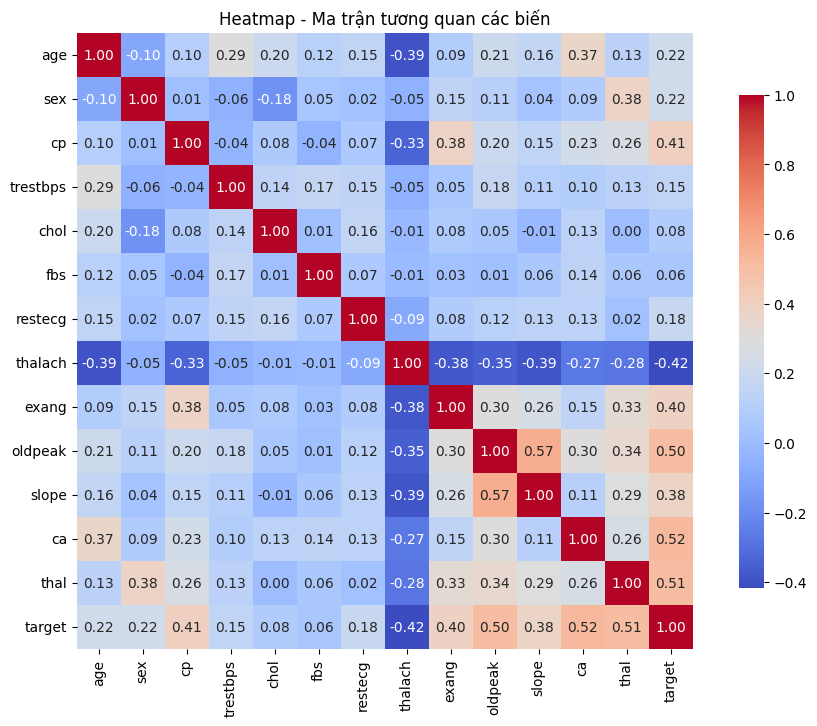

In [ ]:
# Tính ma trận tương quan
corr = processed_data.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap - Ma trận tương quan các biến")
plt.show()

In [ ]:
# Tách dữ liệu từ processed_data
X = processed_data.drop(['target'], axis=1)
y = processed_data['target'].apply(lambda x: 1 if int(x) > 0 else 0)

In [ ]:
#Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Tạo DataFrame để tính VIF
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Tính VIF cho từng biến
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
                   for i in range(X_train_scaled_df.shape[1])]
print(vif_data)


    Variable       VIF
0        age  1.558987
1        sex  1.264659
2         cp  1.344120
3   trestbps  1.241650
4       chol  1.104433
5        fbs  1.075085
6    restecg  1.104379
7    thalach  1.637156
8      exang  1.388426
9    oldpeak  1.681947
10     slope  1.587688
11        ca  1.366042
12      thal  1.481040


In [ ]:
#Huấn luyện mô hình
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Dự đoán và đánh giá
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8852459016393442

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix:
 [[25  4]
 [ 3 29]]


In [ ]:
#Tính ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.927801724137931


In [ ]:
# Lưu model và scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Đã lưu model và scaler thành công!")

Đã lưu model và scaler thành công!


In [ ]:
!pip install streamlit pyngrok

In [ ]:
import streamlit as st
import numpy as np
import joblib

# Load model và scaler
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

st.set_page_config(page_title="Dự đoán bệnh tim", page_icon="🫀")
st.title("Dự đoán nguy cơ mắc bênh tim mạch")
st.write("Nhập thông tin bệnh nhân để dự đoán nguy cơ mắc bệnh tim")

# Tạo sidebar để nhập dữ liệu
st.sidebar.header("Thông tin bệnh nhân")

def user_input():
    age = st.sidebar.slider("Tuổi", 20, 80, 50)
    sex = st.sidebar.selectbox("Giới tính", [0, 1], format_func=lambda x: "Nữ" if x == 0 else "Nam")
    cp = st.sidebar.selectbox("Loại đau ngực", [0, 1, 2, 3])
    trestbps = st.sidebar.slider("Huyết áp nghỉ (mm Hg)", 90, 200, 120)
    chol = st.sidebar.slider("Cholesterol (mg/dl)", 100, 600, 200)
    fbs = st.sidebar.selectbox("Đường huyết lúc đói > 120 mg/dl", [0, 1], format_func=lambda x: "Có" if x == 1 else "Không")
    restecg = st.sidebar.selectbox("Điện tâm đồ", [0, 1, 2])
    thalach = st.sidebar.slider("Nhịp tim tối đa (bpm)", 60, 220, 150)
    exang = st.sidebar.selectbox("Đau thắt ngực khi vận động", [0, 1], format_func=lambda x: "Có" if x == 1 else "Không")
    oldpeak = st.sidebar.slider("ST depression", 0.0, 6.0, 1.0)
    slope = st.sidebar.selectbox("Độ dốc ST", [0, 1, 2])
    ca = st.sidebar.slider("Số mạch máu chính (0-3)", 0, 3, 0)
    thal = st.sidebar.selectbox("Thalassemia", [0, 1, 2, 3])

    data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    return data

# Lấy dữ liệu từ người dùng
input_data = user_input()

# Hiển thị dữ liệu
st.subheader("Thông tin đã nhập:")
labels = ["Tuổi", "Giới tính", "Loại đau ngực", "Huyết áp", "Cholesterol", "Đường huyết lúc đói",
          "Điện tâm đồ", "Nhịp tim tối đa", "Đau thắt ngực khi vận động", "ST depression",
          "Độ dốc ST", "Số mạch máu", "Thalassemia"]

for i, label in enumerate(labels):
    st.write(f"- {label}: {input_data[0][i]}")

# Nút dự đoán
if st.button("Dự đoán"):
    input_scaled = scaler.transform(input_data)
    prob = model.predict_proba(input_scaled)[0, 1]
    risk = "Nguy cơ cao" if prob >= 0.5 else "Nguy cơ thấp"
    st.subheader("Kết quả dự đoán:")
    st.success(f"Xác suất mắc bệnh tim: {prob*100:.1f}% ({risk})")

2025-06-19 10:40:11.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 10:40:11.702 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 10:40:11.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 10:40:11.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 10:40:11.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 10:40:11.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 10:40:11.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 10:40:11.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip show streamlit
!pip show transformers
!pip show pyngrok

Name: streamlit
Version: 1.46.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 
Name: transformers
Version: 4.52.4
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-b

In [ ]:
!rm -rf /root/.ngrok2/ngrok.yml

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2025-06-19 10:46:48--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.71.179.82, 99.83.220.108, 75.2.60.68, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.71.179.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.3’

ngrok-stable-linux- 100%[===================>]  13.28M  71.5MB/s    in 0.2s    

2025-06-19 10:46:48 (71.5 MB/s) - ‘ngrok-stable-linux-amd64.zip.3’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ngrok config add-authtoken 2xUIVFYU2YvFW3y6YFfgXHSFYx1_3JUNxFUJqN1cZazyR8XTn

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!./ngrok http 8501

Usage of ngrok requires a verified account and authtoken.

Sign up for an account: https://dashboard.ngrok.com/signup
Install your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken

ERR_NGROK_4018



In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!ls

app.py	   ngrok-stable-linux-amd64.zip    ngrok-stable-linux-amd64.zip.3
model.pkl  ngrok-stable-linux-amd64.zip.1  sample_data
ngrok	   ngrok-stable-linux-amd64.zip.2  scaler.pkl


In [ ]:
pip install streamlit transformers torch

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.135.137:8501

  Stopping...
  Stopping...


In [ ]:
!streamlit run app.py --server.port 8501 --server.headless true &>/dev/null&

In [ ]:
!lsof -i:8501

COMMAND     PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
streamlit 14046 root    6u  IPv4 353221      0t0  TCP *:8501 (LISTEN)
streamlit 14046 root    7u  IPv6 353222      0t0  TCP *:8501 (LISTEN)


In [ ]:
!ps aux | grep streamlit

root       14046 16.7  0.4  69716 59020 ?        S    10:47   0:00 /usr/bin/python3 /usr/local/bin/streamlit run app.py --server.port 8501 --server.headless true
root       14067  0.0  0.0   7376  3424 ?        S    10:47   0:00 /bin/bash -c ps aux | grep streamlit
root       14069  0.0  0.0   6484  2320 ?        S    10:47   0:00 grep streamlit


In [ ]:
from pyngrok import ngrok

# Mở cổng ngrok để tạo URL công khai
public_url = ngrok.connect(8501)  # 8501 là cổng mặc định của Streamlit
print("Mở ứng dụng tại:", public_url)

Mở ứng dụng tại: NgrokTunnel: "https://126a-34-139-135-137.ngrok-free.app" -> "http://localhost:8501"
